# Introduction to Neural Network classification with TensorFlow

A classification problem is where you try to classify something as one thing or another.   
We have:
* Binary Classification: we have two labels (e.g. spam or not spam)
* Multiclass Classification: we have more than two labels (eg. dog, human, flower)
* Multilabel Classification: we need to associate many labels to a predication (eg. associate tags to a given text)


In [1]:
from sklearn.datasets import make_circles
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
import tensorflow as tf
tf.__version__

'2.10.0'

## Creating binary dataset to work on

In [3]:
n_samples = 1000
X,y = make_circles(n_samples,noise=.03,random_state=42)

In [4]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
y[:9]

array([1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
X[0]

array([0.75424625, 0.23148074])

In [8]:
y[0]

1

Let's visualize the data

In [9]:
circle_df = pd.DataFrame({
    "X0":X[:,0],
    "X1":X[:,1],
    "label":y
})
circle_df.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


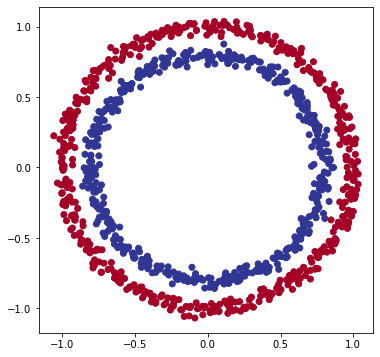

In [10]:
plt.figure(figsize=[6,6])

plt.scatter(data=circle_df, x="X0",y="X1",c="label", cmap=plt.cm.RdYlBu);

The model we want to build will tell wether a given point is red or blue

🛠️ **Exercise**: Spend some 20 minutes playing around with [https://playground.tensorflow.org](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.14726&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) building and running different neural networks. See what happens when you change different hyperparameters.

## Steps in creating a classification model
Those steps are:
1. Create or import a model
1. Compile the model
1. Fit the model
1. Evaluate the model
1. Tweak the model
1. Evaluate the model
1. An iteration of the previous two steps

In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Creating a model using the Sequential API
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), #.binary_crossentropy,
                optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X,y, epochs=5, verbose=1)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 4.6955 - accuracy: 0.4850
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 5.2826 - accuracy: 0.5550
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 4.9352 - accuracy: 0.5510
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 6.0908 - accuracy: 0.5030
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 5.8534 - accuracy: 0.5140


The accuracy is 0.4960, 49.6%. This means that on average, out of 100 examples, the model only gets 50 examples right. This in turn mean that the model is basically guessing.

Let's try and improve the model by training for longer.

In [12]:
# Let's train for 200 more epochs (for a total of 205 epochs)
history = model_1.fit(X,y, epochs=200, verbose=1)

Epoch 1/200
32/32 [==============================] - 0s 2ms/step - loss: 4.8455 - accuracy: 0.5270
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 4.5462 - accuracy: 0.5230
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 4.5197 - accuracy: 0.5290
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 4.9783 - accuracy: 0.5140
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 5.2005 - accuracy: 0.5220
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 4.1825 - accuracy: 0.5260
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 3.8111 - accuracy: 0.5180
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 3.4553 - accuracy: 0.5190
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 1.9556 - accuracy: 0.5080
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7281 - accuracy: 0.4900
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4930
Epoch 84/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4960
Epoch 85/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4930
Epoch 86/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4880
Epoch 87/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4720
Epoch 88/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4470
Epoch 89/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4720
Epoch 90/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4820
Epoch 91/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4860
Epoch 92/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.5050
Epoch 93/200


32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4610
Epoch 165/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4970
Epoch 166/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4800
Epoch 167/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4930
Epoch 168/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4690
Epoch 169/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4880
Epoch 170/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4850
Epoch 171/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4980
Epoch 172/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4770
Epoch 173/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4730
Epoc

The accuracy here is 0.4810, 48%. The model performance did not improved that much.

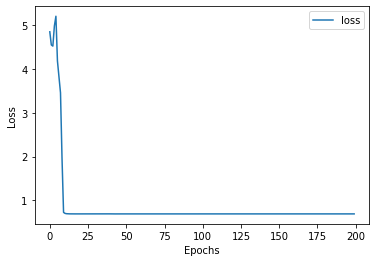

In [13]:
# Plot history
history_df = pd.DataFrame(history.history)
history_df.plot(kind="line",y="loss")
plt.ylabel("Loss")
plt.xlabel("Epochs");

And looking at the plot, our model is performing really poorly and seems unable to converge.

Let's try to improve the model by setting an extra layer.

In [14]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

# 3. Fit the model
history_2 = model_2.fit(X,y,epochs=100,verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 1.7806 - accuracy: 0.4850
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.4930
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.4690
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.4790
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.4740
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5210
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.4780
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4850
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.4820
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.4880
Epoch 85/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.4910
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5040
Epoch 87/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.4810
Epoch 88/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.4530
Epoch 89/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6961 - accuracy: 0.4780
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5030
Epoch 91/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.4880
Epoch 92/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.4970
Epoch 93/100


The accuracy of model_2 is about the same as model_1 even with an extra layer.

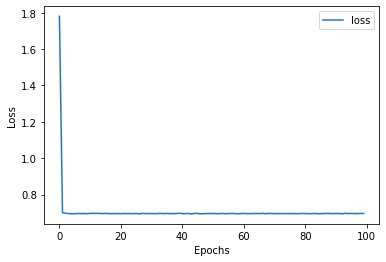

In [15]:
# Plot history
history_df2 = pd.DataFrame(history_2.history)
history_df2.plot(kind="line",y="loss")
plt.ylabel("Loss")
plt.xlabel("Epochs");

We can also see from the above plot that the model is no more improving after its first epoch.

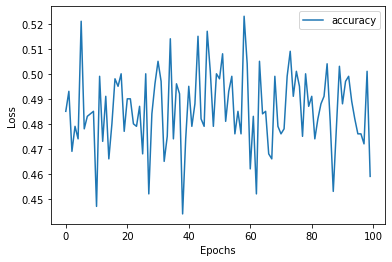

In [16]:
history_df2.plot(kind="line",y="accuracy")
plt.ylabel("Loss")
plt.xlabel("Epochs");

## Improving a model

In [17]:
# Set random seed
tf.random.set_seed(42)

# 1. Creating a model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Improving the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# 3. Fit the model
history_3 = model_3.fit(X,y,epochs=100,verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 3.3602 - accuracy: 0.4660
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7765 - accuracy: 0.4670
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7219 - accuracy: 0.4620
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7064 - accuracy: 0.4610
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6988 - accuracy: 0.4360
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.4600
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4280
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4600
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4630
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4640
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.4760
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.5040
Epoch 85/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.4710
Epoch 86/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6982 - accuracy: 0.5020
Epoch 87/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.4630
Epoch 88/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.4510
Epoch 89/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.4710
Epoch 90/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.4270
Epoch 91/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.5010
Epoch 92/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.4880
Epoch 93/100


The accuracy, 0.4970 (49.7%), is still about the same as that of the old models.

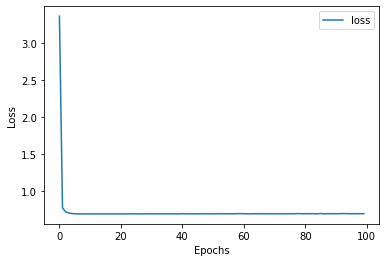

In [18]:
# Plot history
history_df3 = pd.DataFrame(history_3.history)
history_df3.plot(kind="line",y="loss")
plt.ylabel("Loss")
plt.xlabel("Epochs");

Looking at the loss evolution over the epochs, the model is not learning anything from the data after its first epoch.

Recalling our ML practioner motto: `visualize, visualize, visualize`. It is good idea to visualize the following as much as possible (specially whenever the model is not performing as wanted):
* the data: to know what is look like
* the model: to know its layers and its differents components
* the training: observing the loss in a plot
* the predictions

We will visualize our model predictions against the label. 

In [19]:
def plot_decision_boundary(model, X, y)->None:
    """
        Plots the decision boundary craeted by a model predicting on X
    
        Params:
            - trained model
            - features (X)
            - label (y)
            
        Do:
            - Create a meshgrid of the different X values
            - Make predictions acorss the meshgrid
            - Plot the prediction as well as a line between the different zones (where each unique class falls)
            
            
        numpy meshgrid: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
        
        Inspired by:
            - https://cs231n.github.io/neural-networks-case-study/
    """
    
    # Define the axis boundaries of the plot and create a meshgrid
    x_min = X[:,0].min() - .1  # -0.1 was done to give oursleves a little bit of margin in the future plot
    x_max = X[:,0].max() + .1
    y_min = X[:,1].min() - .1
    y_max = X[:,1].max() + .1
    
    # Create the meshgrid
    xx, yy = np.meshgrid( np.linspace(x_min,x_max,100),
                          np.linspace(y_min,y_max,100))
    
    # Create new X values (predictions will be make on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class or binary-class classification
    if len(y_pred[0])>1:
        print("Doing multi-class classification")
        # Reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
Doing binary classification


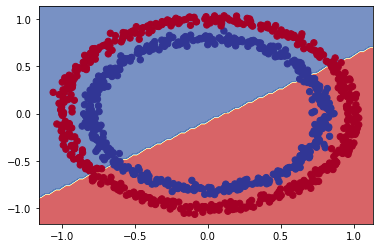

In [20]:
# Check out the predictons our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

The above plot explains why the model is performing poorly: it looks like it's trying to draw straight line as a decision boundary to separate the data (the white line separating the red zone of the rectangle from the blue zone of the rectangle).      

The issue here is that we have got a circular data (the red and blue points for two circles), so they are not separable by a straight line. If we were working on a regression problem, our current model might actually work, but for our current problem the model is inappropriate.

## Non-linearity in a model

Let's try to use a model based on a linear activation function to make predictions.

In [21]:
# Set seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=.001),
               metrics=["accuracy"])

# 3. Fit the model
history_4 = model_4.fit(X,y,epochs=100,verbose=1)

Epoch 1/100


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 6.1185 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0730 - accuracy: 0.4810
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0480 - accuracy: 0.4800
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0520 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0425 - accuracy: 0.4800
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0295 - accuracy: 0.4800
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0236 - accuracy: 0.4800
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0224 - accuracy: 0.4790
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0216 - accuracy: 0.4790
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0208 - accuracy: 0.4790
Epoch 11/100
32/32 [=

32/32 [==============================] - 0s 3ms/step - loss: 4.6705 - accuracy: 0.4700
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 4.6689 - accuracy: 0.4700
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6674 - accuracy: 0.4690
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6661 - accuracy: 0.4690
Epoch 87/100
32/32 [==============================] - 0s 3ms/step - loss: 4.6648 - accuracy: 0.4700
Epoch 88/100
32/32 [==============================] - 0s 3ms/step - loss: 4.6635 - accuracy: 0.4710
Epoch 89/100
32/32 [==============================] - 0s 3ms/step - loss: 4.6623 - accuracy: 0.4710
Epoch 90/100
32/32 [==============================] - 0s 3ms/step - loss: 4.6612 - accuracy: 0.4710
Epoch 91/100
32/32 [==============================] - 0s 3ms/step - loss: 4.6601 - accuracy: 0.4710
Epoch 92/100
32/32 [==============================] - 0s 3ms/step - loss: 4.6591 - accuracy: 0.4700
Epoch 93/100


The accuracy is 0.4740 (47.4%), the model is still performing poorly.

Let's remind ourselves of what our data looks like, because whenever our model predictions are not working very well, we can evaluate our model by looking at the evaluation metrics or we can adhere to our ML practionner motto: visualize.

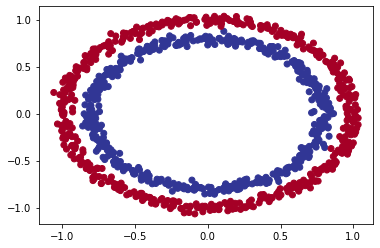

In [22]:
# Reminding ourselve of what our data looks like
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 2ms/step
Doing binary classification


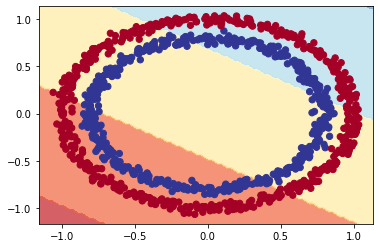

In [23]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,X=X, y=y)

* Everything in the yellow zone could be blue or red point (which is why the model is performing so poorly)
* Everything in the red zone is classified as red point
* Everything in the blue zone is classified as blue point

Let's try to build a neural network with a non-linear activation function.

In [24]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=.001),
               metrics=["accuracy"])

# 3. Fit the model
history_5 = model_5.fit(X,y,epochs=100,verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 6.2421 - accuracy: 0.4880
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2397 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2178 - accuracy: 0.4880
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2105 - accuracy: 0.4880
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2192 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2062 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2051 - accuracy: 0.4880
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 6.2044 - accuracy: 0.4880
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1957 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1809 - accuracy: 0.4880
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 5.9907 - accuracy: 0.4830
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9778 - accuracy: 0.4830
Epoch 85/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9770 - accuracy: 0.4830
Epoch 86/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9765 - accuracy: 0.4840
Epoch 87/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9762 - accuracy: 0.4840
Epoch 88/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9758 - accuracy: 0.4840
Epoch 89/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9756 - accuracy: 0.4840
Epoch 90/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9753 - accuracy: 0.4840
Epoch 91/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9751 - accuracy: 0.4840
Epoch 92/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9749 - accuracy: 0.4840
Epoch 93/100


The accuracy is 0.4720 (47.2%). The model is still performing poorly.

We are going to build a more complex model, with a non-line

In [25]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=["accuracy"])

# 3. Fit the model
history_6= model_6.fit(X,y,epochs=200, verbose=1)

Epoch 1/200
32/32 [==============================] - 1s 3ms/step - loss: 3.4304 - accuracy: 0.4630
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 2.5486 - accuracy: 0.4590
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 2.2073 - accuracy: 0.4520
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 1.9890 - accuracy: 0.4470
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 1.9362 - accuracy: 0.4470
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 1.9046 - accuracy: 0.4370
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 1.8445 - accuracy: 0.4150
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 1.2160 - accuracy: 0.4340
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.9386 - accuracy: 0.4380
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.9146 - accuracy: 0.4120
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.7047 - accuracy: 0.4340
Epoch 84/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7034 - accuracy: 0.4260
Epoch 85/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7027 - accuracy: 0.4260
Epoch 86/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7020 - accuracy: 0.4250
Epoch 87/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7008 - accuracy: 0.4350
Epoch 88/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.4530
Epoch 89/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6991 - accuracy: 0.4590
Epoch 90/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6982 - accuracy: 0.4810
Epoch 91/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.4560
Epoch 92/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.4370
Epoch 93/200


32/32 [==============================] - 0s 3ms/step - loss: 0.5647 - accuracy: 0.7500
Epoch 165/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5610 - accuracy: 0.7830
Epoch 166/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5556 - accuracy: 0.8030
Epoch 167/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5515 - accuracy: 0.8230
Epoch 168/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5456 - accuracy: 0.8270
Epoch 169/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5406 - accuracy: 0.8410
Epoch 170/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5352 - accuracy: 0.8580
Epoch 171/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5292 - accuracy: 0.8710
Epoch 172/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5244 - accuracy: 0.8590
Epoch 173/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5186 - accuracy: 0.8750
Epoc

The accuracy is 0.9620 (96%). This means that out of 100 predictions, 96 are made right.

313/313 [==============================] - 1s 2ms/step
Doing binary classification


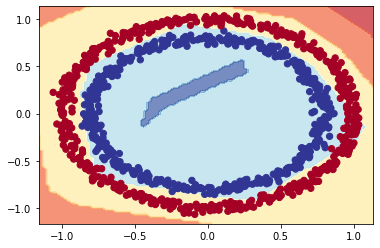

In [26]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_6,X=X, y=y)

Looking at the plot, the model has a nearly perfect decision boundary (which explain the high accuracy), but it's in doubt about the position blue and right zones (we can see that by the fact there are hue in the zones). Let's try to resolve that by putting an activation function on the last layer.

In [27]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # we are using sigmoid activation on the last layer because it is a binary classification problem
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=.001),
               metrics=["accuracy"])

# 3. Fit the model
history_7= model_7.fit(X,y,epochs=200, verbose=1)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 0.7262 - accuracy: 0.5010
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7039 - accuracy: 0.5130
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5090
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5160
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.5270
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6821 - accuracy: 0.5350
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6809 - accuracy: 0.5430
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.5490
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.5480
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.5420
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.5292 - accuracy: 0.7620
Epoch 84/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5252 - accuracy: 0.7660
Epoch 85/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5221 - accuracy: 0.7670
Epoch 86/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5189 - accuracy: 0.7710
Epoch 87/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5147 - accuracy: 0.7660
Epoch 88/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5114 - accuracy: 0.7660
Epoch 89/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5078 - accuracy: 0.7660
Epoch 90/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5040 - accuracy: 0.7750
Epoch 91/200
32/32 [==============================] - 0s 3ms/step - loss: 0.5007 - accuracy: 0.7780
Epoch 92/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4972 - accuracy: 0.7890
Epoch 93/200


32/32 [==============================] - 0s 3ms/step - loss: 0.3199 - accuracy: 0.8630
Epoch 165/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3178 - accuracy: 0.8630
Epoch 166/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3160 - accuracy: 0.8600
Epoch 167/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3136 - accuracy: 0.8650
Epoch 168/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3118 - accuracy: 0.8620
Epoch 169/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3098 - accuracy: 0.8640
Epoch 170/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3070 - accuracy: 0.8680
Epoch 171/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3054 - accuracy: 0.8680
Epoch 172/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3034 - accuracy: 0.8670
Epoch 173/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3007 - accuracy: 0.8700
Epoc

The accuracy for our last model is 0.9980 (99.8%). This means that out 100 predictions, all of them are made right. This model is a good one.

Let's visualize what how our model is performing on the data.

313/313 [==============================] - 1s 2ms/step
Doing binary classification


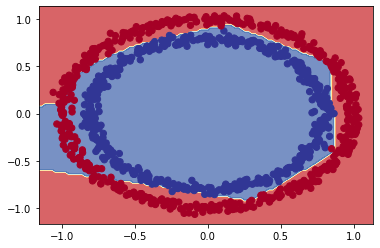

In [28]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_7,X=X, y=y)

The model has an excellent decision boundary, which explain why it is performing so well on the data.

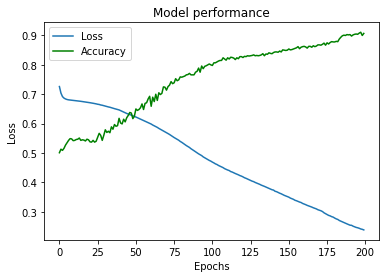

In [29]:
# Plot history
history_df7 = pd.DataFrame(history_7.history)

sb.lineplot(data=history_df7, y="loss", x=range(0,200),  label="Loss" )
sb.lineplot(data=history_df7, y="accuracy", x=range(0,200), color="green", label="Accuracy" )

plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(loc="upper left")

plt.title("Model performance");

## Understanding how activation functions work

The combination of linear (straight lines) and non-linear (non-straight lines) is one of the key fundamental of how a neural networks work.
An activation function somewhat tells the neural network if a given layer should draw a straight or a non-straight line, and how it should draw it.

Read [https://www.v7labs.com/blog/neural-networks-activation-functions](https://www.v7labs.com/blog/neural-networks-activation-functions) for further details.

Let's see how activation functions work.

In [30]:
# Create a toy tensor (similar to the data we pass to our models)
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

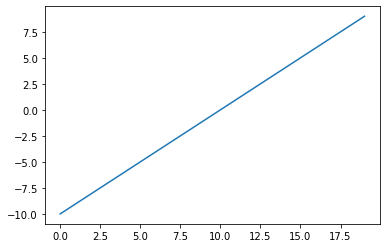

In [31]:
# Visualize the toy tensor
plt.plot(A);

Our tensor is a straight line. Let's try to apply a sigmoid function on it to see what it will become.

In [32]:
# Define a sigmoid function: sigmoid(x) = 1 / ( 1 + exp(-x) )
def sigmoid(x):
    return 1 / (1 + tf.exp(-x) )

# Test the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

Now let us see what our data looks like after the sigmoid function is applied to it. Recall that the data was originally a straight line.

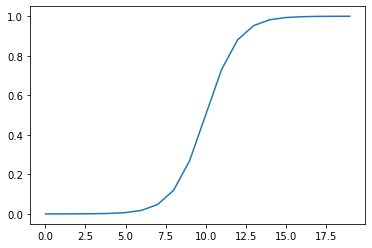

In [33]:
plt.plot(sigmoid(A));

The data on which a sigmoid function is applied is now a non-straight line. That is what an activation function does: it introduce non-linearity in a model.

According to [https://www.v7labs.com/blog/neural-networks-activation-functions](https://www.v7labs.com/blog/neural-networks-activation-functions):

*Activation functions introduce an additional step at each layer during the forward propagation, but its computation is worth it. Here is why—  <br/>
Let’s suppose we have a neural network working without the activation functions.<br/>
In that case, every neuron will only be performing a linear transformation on the inputs using the weights and biases. It’s because it doesn’t matter how many hidden layers we attach in the neural network; all layers will behave in the same way because the composition of two linear functions is a linear function itself. <br/>
Although the neural network becomes simpler, learning any complex task is impossible, and our model would be just a linear regression model.*

The same article talks about activation functions, and which type of straight or non-straight each line each one draws. 

In [34]:
# Let's try to replicate relu function: relu(x)= max(0,X)
def relu(x):
    return tf.maximum(0,x)

# Test relu function on our tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

Now let us see what our data looks like after the relu function is applied to it. Recall that the data is originally a straight line.

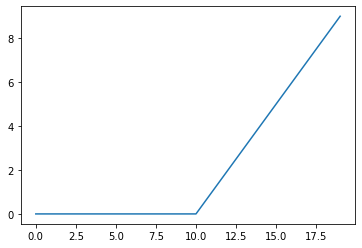

In [35]:
plt.plot(relu(A));

In conclusion, an activation function gives its layer the ability to draw a straight or a non-straight line. In the case of a non-straight line, the specific line is define by the activation function.

📖 : [https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html)

## Leveraging the learning rate to improve the model convergence time

From here, we will create a training and a test set.

In [36]:
len(X)

1000

In [37]:
# Split manually into train and test sets
X_train, y_train = X[:800,:], y[:800]
X_test, y_test= X[800:,:], y[800:]
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [41]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=.01), # We set the learning rate to 0.01 (it was 0.001). The learning rate tell by how much the model should update its weights and bias
               metrics=["accuracy"])

# 3. Fit the model
history_8 = model_8.fit(X_train, y_train, epochs=50, verbose=1) # We decrease the epochs to 50

Epoch 1/50
25/25 [==============================] - 1s 3ms/step - loss: 0.6934 - accuracy: 0.4825
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4800
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.4925
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5075
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5325
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5100
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.5400
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6789 - accuracy: 0.5437
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.5713
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6657 - accuracy: 0.5775
Epoch 11/50
25/25 [

Because we increase the learning rate, the model learned faster.

In [43]:
# 4. Evaluate the model
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1469 - accuracy: 0.9650


[0.14694218337535858, 0.9649999737739563]

On the test set (data that the model has never seen before), we got an accuracy of 96.5% (over a 100 predictions, 96 were made right)

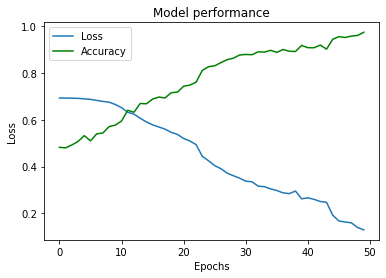

In [42]:
# Plot history
history_df8 = pd.DataFrame(history_8.history)

sb.lineplot(data=history_df8, y="loss", x=range(0,50),  label="Loss" )
sb.lineplot(data=history_df8, y="accuracy", x=range(0,50), color="green", label="Accuracy" )

plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(loc="upper left")

plt.title("Model performance");

313/313 [==============================] - 1s 2ms/step
Doing binary classification


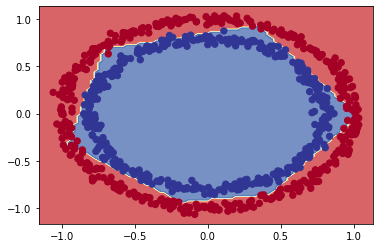

In [44]:
# Plot decision boundary for training set
plot_decision_boundary(model=model_8,X=X_train, y=y_train)

313/313 [==============================] - 1s 2ms/step
Doing binary classification


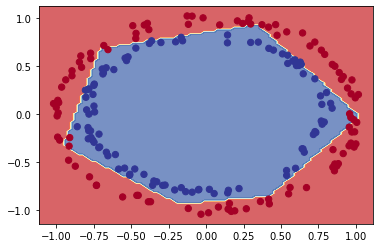

In [45]:
# Plot decision boundary for test set
plot_decision_boundary(model=model_8,X=X_test, y=y_test)

📕 The main takeaway is all we did was took `model_7`, increased its learning rate by 10 times (from 0.001 to 0.01), and the model converged faster.

## Find the ideal learning rate for a model